In [40]:
import pandas as pd
import numpy as np
import scipy
from scipy import io
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
import glob
import random

from scipy.optimize import curve_fit

from astropy.io import fits
from astropy.time import Time
from astropy import units as u
import scipy.integrate as integrate
import lightkurve

from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

import math
import datetime as dt
import lightkurve.io as l
from lightkurve.io.generic import read_generic_lightcurve

In [48]:
#repository like the one we have online
general_data = pd.read_csv('/Users/kmanj/FITS_BD_Files/Repository_Data/Repository.csv', encoding ='latin1')

In [49]:
dir_save = '/Users/kmanj/FITS_BD_Files/Data/Biller_2018/'

In [50]:
new_name_file = 'J2114-22'
Object = '2MASS J21140802-2251358'
Reference = 'Biller et al 2018 AJ 155 95'
Instrument_1 = 'Spitzer'
filter_1 = 'Spitzer/IRAC.I1'
Instrument_2 = 'HST'
filter_2 = 'HST/WFC3_IR.G141'
Date_obs_Spitzer = '2016-09-08 - 2016-09-09' #~17.2 hr monitoring period
Date_obs_HST = '2016-09-08 11:38:59 - 2016-09-08 18:44:41' #~7 hr simultaneous monitoring period
Band_obs_Spitzer = '[4.5]'
Band_obs_HST = 'WFC3, G141 grism (ID 14188)'
RA = '318.5334357'
Dec = '-22.85996669'
SpT = 'L7.5'
Jmag = '16.706 +/- 0.195'
Hmag = '15.72 +/- 0.17'
Kmag = '14.74 +/- 0.118'

In [51]:
with fits.open('/Users/kmanj/Manjavacas Research/Biller_2018/PSO318_Spitzer_unbinned.fits') as f:
    time = f[1].data['TIME']
    flux = f[1].data['FLUX']


In [52]:
time[0]

array([8.5449219e-04, 9.4604492e-03, 1.8066406e-02, ..., 1.6734436e+01,
       1.6743042e+01, 1.6751648e+01], dtype=float32)

In [53]:
t = time[0] * (u.h)
flux = flux[0] * (u.dimensionless_unscaled)

lc = l.LightCurve(time = t, flux = flux)
lc

time,flux,flux_err
,,
Time,float32[1],float64
3.5603841145833336e-05,0.9762559533119202,nan
0.0003941853841145833,0.9899498224258423,nan
0.0007527669270833334,0.9867329001426697,nan
0.0011113484700520833,0.9902723431587219,nan
0.0014801025390625,0.9866465926170349,nan
0.00183868408203125,0.997214138507843,nan
0.0021870930989583335,0.9790116548538208,nan
0.0025583902994791665,0.9936231374740601,nan


In [54]:
print(t)

[8.5449219e-04 9.4604492e-03 1.8066406e-02 ... 1.6734436e+01 1.6743042e+01
 1.6751648e+01] h


<Axes: xlabel='Time [JD]', ylabel='Flux'>

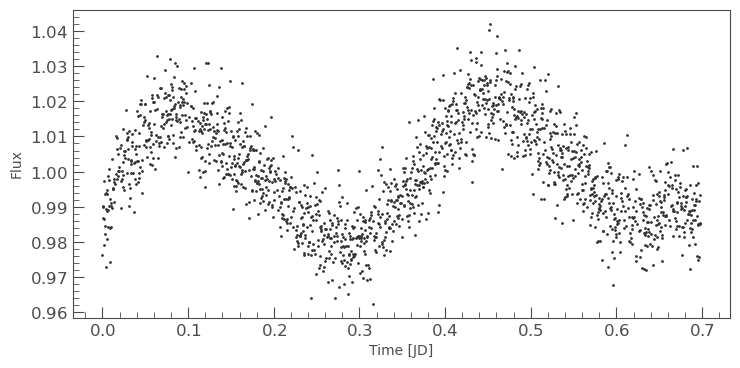

In [55]:
lc.scatter()

In [9]:
t

<Quantity [2.0507812e-02, 2.2705078e-01, 4.3359375e-01, ..., 4.0162646e+02,
           4.0183301e+02, 4.0203955e+02] h>

In [56]:
# Populate binary fits table
lc.to_fits(path = '/Users/kmanj/FITS_BD_Files/Data/Biller_2018/2MASS_J21140802-2251358_Bill2018.fits')


[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001F6788CDED0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001F6785239A0>]

In [57]:
with fits.open('/Users/kmanj/FITS_BD_Files/Data/Biller_2018/2MASS_J21140802-2251358_Bill2018.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object
    f[0].header['SPECTYPE'] = SpT
    f[0].header['DATE_OBS'] = Date_obs_Spitzer
    f[0].header['SPECBAND'] = Band_obs_Spitzer
    f[0].header['TSTART'] = 57639.375856
    f[0].header['TSTOP'] = 57640.096146
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument_1
    f[0].header['FILTER'] = filter_1
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA
    f[0].header['DEC_OBJ'] = Dec
    f[0].header['JMAG'] = Jmag
    f[0].header['HMAG'] = Hmag
    f[0].header['KMAG'] = Kmag

<Axes: xlabel='Time [JD]', ylabel='Flux'>

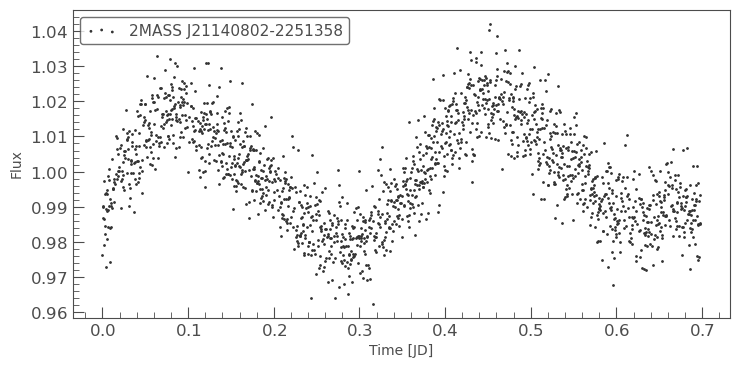

In [58]:
lc = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Biller_2018/2MASS_J21140802-2251358_Bill2018.fits", time_format = 'jd')
lc.scatter()